**Section3:** we do analysing about Water Stress
* First, Water stress level of Countries in 2018
* Second, Water stress level of Countries in 2040

In [27]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
from branca.element import Figure
import matplotlib.pyplot as plt
import geopandas as gpd
import branca.colormap as cm

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import folium
import json

## **WATER STRESS LEVEL IN 2018**

In [3]:
# Loading data, we use the data that we have preprocessing in the Factor Analysis part. This data is in year 2018
df = pd.read_excel('CFA_data.xlsx')
df.head()

,Unnamed: 0,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,...,ws,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region
0,0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,...,137.920360,14.463198,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa
1,1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,...,141.165756,4.584392,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa
2,2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,...,817.142857,4.287072,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa
3,3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,...,50.751212,8.715869,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa
4,4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,...,95.998781,10.220137,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa


In [4]:
# Dropping column named Unnamed: 0
df.drop(columns="Unnamed: 0", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  165 non-null    float64
 1   ppl_den     165 non-null    float64
 2   gdp_per     165 non-null    float64
 3   gdp_agri    165 non-null    float64
 4   gdp_ind     165 non-null    float64
 5   gdp_ser     165 non-null    float64
 6   ws_in       165 non-null    float64
 7   ws_tot      165 non-null    float64
 8   ww_agri     165 non-null    float64
 9   ww_ind      165 non-null    float64
 10  ww_mu       165 non-null    float64
 11  ww_tot      165 non-null    float64
 12  ww_per      165 non-null    float64
 13  ww_fresh    165 non-null    float64
 14  ws          165 non-null    float64
 15  wue         165 non-null    float64
 16  wue_agri    165 non-null    float64
 17  wue_ind     165 non-null    float64
 18  wue_ser     165 non-null    float64
 19  wd_tot      165 non-null    f

In [5]:
## Calculating the world population in 2018
df['total_population']=df['population'].sum()
df.head()

,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,total_population
0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,0.19100,...,14.463198,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa,7599006.521
1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,5.40000,...,4.584392,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa,7599006.521
2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,0.28000,...,4.287072,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa,7599006.521
3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,0.21200,...,8.715869,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa,7599006.521
4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,0.04588,...,10.220137,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa,7599006.521


The world population in 2018 of all countries in this dataset is 7599006.521 thousand people.

In [7]:
# Making the scatter plot for population of countries versus Water stress 
fig = go.Figure(go.Scatter(x=df.population, y=df.ws, text=df.country, mode='markers'))

fig.update_xaxes(title_text='population', type='log')
fig.update_yaxes(title_text='ws')
fig.update_layout(title_text='Country population and Water stress')

# Saving the figure in html
pio.write_html(fig, file='population_and_ws.html', auto_open=True)
fig.show()

* For example, Kuwait with 4,137 million of population has the highest water stress (3,850.5), which means that the proportion of water withdrawal is 38.85 times of water resources (water availaible).
* Moreover, China with 1.459 billion population has that water stress  is 43.221, it indicates that the proportion of water withdrawal with water resources is 43.221% so they are at a high water stress. It is also the same for India (66.45%), the second largest population country in the world.

**Water stress is defined into categories based on the percentage of withdrawals to renewable water resources, as follows:**

* lower than 10% = low stress (level 1)

* 10-20% = low-to-medium stress (level 2)

* 20-40% = medium-to-high stress (level 3)

* 40-80% = high stress (level 4)

* higher than 80% = extremely high stress (level 5)

Reference: https://ourworldindata.org/water-use-stress

In [9]:
bins = [0, 10, 20, 40, 80, np.inf]
names = ['low stress', 'low-to-medium stress', 'medium-to-high stress', 'high stress', 'extremely high stress']

df['Water_stress_level'] = pd.cut(df['ws'], bins, labels=names)
df['Water_stress_level'] = pd.factorize(df['Water_stress_level'], sort=True)[0]+1

df.head()

,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,total_population,Water_stress_level
0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,0.19100,...,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa,7599006.521,5
1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,5.40000,...,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa,7599006.521,5
2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,0.28000,...,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa,7599006.521,5
3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,0.21200,...,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa,7599006.521,4
4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,0.04588,...,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa,7599006.521,5


In [11]:
# Countries have level 5 of water stress level (extremely high stress)
ws_countries_level_5 = df[df["Water_stress_level"]==5]
ws_countries_level_5

,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,total_population,Water_stress_level
0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.6670,6.6710,0.19100,...,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa,7599006.521,5
1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.5000,61.3500,5.40000,...,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa,7599006.521,5
2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.7000,4.8500,0.28000,...,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa,7599006.521,5
4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.6150,2.9326,0.04588,...,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa,7599006.521,5
25,41801.533,22.545392,1216.883086,1.205537e+10,6.638028e+09,2.984342e+10,95.690270,37.8000,25.9100,0.07500,...,0.206446,171.220998,60.772098,55.5,50.2,66.0,Sudan,Africa,7599006.521,5
63,286.641,666.606977,17761.544810,6.613034e+07,5.479885e+08,3.853896e+09,279.094756,0.0800,0.0548,0.00620,...,0.904937,83.872091,182.855345,99.7,99.7,99.7,Barbados,Americas,7599006.521,5
80,1569.446,2012.110256,24171.328414,1.088922e+08,1.572796e+10,2.164814e+10,2.548670,0.1160,0.1447,0.01410,...,0.629710,1009.884728,71.114798,100.0,100.0,100.0,Bahrain,Asia,7599006.521,5
81,4137.312,232.172391,33760.739169,6.836448e+08,8.232680e+10,7.394327e+10,0.000000,0.0200,0.7784,0.02330,...,0.710413,2858.041006,133.417578,99.0,99.0,99.0,Kuwait,Asia,7599006.521,5
82,4829.473,15.604113,19070.911771,2.069422e+09,4.481167e+10,4.883301e+10,289.886702,1.4000,1.5470,0.23800,...,1.220496,171.787562,506.300483,93.4,86.1,95.5,Oman,Asia,7599006.521,5
83,2781.682,242.095909,71010.319284,3.357143e+08,1.152500e+11,8.324093e+10,20.131704,0.0580,0.2300,0.03500,...,1.298994,2930.474648,120.260031,100.0,100.0,100.0,Qatar,Asia,7599006.521,5


In [12]:
# Total population in all countries have extreme high water stress
ws_countries_level_5 ['population_2018'] = ws_countries_level_5["population"].sum()
ws_countries_level_5.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3244\3276111987.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,total_population,Water_stress_level,population_2018
0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,0.19100,...,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa,7599006.521,5,726621.478
1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,5.40000,...,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa,7599006.521,5,726621.478
2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,0.28000,...,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa,7599006.521,5,726621.478
4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,0.04588,...,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa,7599006.521,5,726621.478
25,41801.533,22.545392,1216.883086,1.205537e+10,6.638028e+09,2.984342e+10,95.690270,37.800,25.9100,0.07500,...,171.220998,60.772098,55.5,50.2,66.0,Sudan,Africa,7599006.521,5,726621.478


**In 2018, in terms of 7599006.521 thousand people in the world, there were 726621.478 thousand people living in countries with extreme water stress, corresponding to 9.56% of world population.**

In [14]:
# 23 Countries was in the Extremely Water Stress
top_ws_2018 = df.sort_values('ws',ascending=False).head(23)

# Plot
fig = px.histogram(top_ws_2018, y="country", x='ws')
fig.update_xaxes(title_text='Water Stress')
fig.update_yaxes(title_text='country')
fig.update_layout(title_text='23 countries have the extreme water stress in 2018')
pio.write_html(fig, file='Water_stress_top23_2018.html', auto_open=True)
fig.show()

**In 2018, 23 countries were under extremely high water stress (level 5). In terms of 23 countries, there are one country in the Americas (Barbados), one country in Europe (Malta), 5 countries in Africa, and 16 countries in Asia.**

For example, Kuwait have the extreme water stress, the reasons can be: Kuwait has no lakes or rivers, and the main natural water resources are limited to brackish groundwater. Water requirements are obtained from three main sources: seawater desalination, treated wastewater and brackish groundwater.

Reference: https://water.fanack.com/kuwait/water-resources-in-kuwait/#:~:text=Kuwait%20has%20no%20lakes%20or,as%20indicated%20in%20Figure%201.

### Mapping water stress level of countries in 2018

In [16]:
# Loading countries polygons
geo_path = 'world-countries.json'
country_geo = json.load(open(geo_path))
gpf = gpd.read_file(geo_path)

# Merging on the country codes
merge = pd.merge(gpf, df, left_on='name', right_on='country')
data_to_plot = merge[["country", "Water_stress_level","population","ws", "geometry"]]

# Creating a discrete color map
values = data_to_plot[['Water_stress_level']].to_numpy()
color_step = cm.StepColormap(['red', 'blue', 'green', 'purple', 'orange'], 
                             vmin=values.min(), vmax=values.max(), caption='Water stress level - YEAR 2018')

color_step

In [17]:
def make_geojson_choropleth(display, data, colors):
    group_dict = data.set_index('country')['Water_stress_level'] # Dictionary of Countries and water stress levels
    tooltip = folium.features.GeoJsonTooltip(["country","Water_stress_level"], aliases=display, labels=True)
    return folium.GeoJson(data[["country","Water_stress_level","population","ws","geometry"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['country']]),
                               'color':'black',
                               'weight':0.5},
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Making a map appear inline on notebook
def display(m, width, height):
    """Takes a folium instance and embed HTML."""
    fig = Figure(width=width, height=height)
    fig.add_child(m)

In [18]:
# Initializing our Folium Map
m = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth = make_geojson_choropleth(["Country:", "Water_stress_level"], data_to_plot, color_step)
geojson_choropleth.add_to(m)

width, height = 1000, 675
display(m, width, height)
m.add_child(color_step)


In [19]:
# Save the map
m.save("water_stress_2018.html")

## **WATER STRESS LEVEL IN 2040**

We load the new dataset about water stress in 2020, 2030, 2040. The dataset was doawloaded from the above website.

Reference: https://www.wri.org/insights/ranking-worlds-most-water-stressed-countries-2040#:~:text=Water%20Stress%20for%20the%20World's%20Largest%20Economies&text=High%20water%20stress%20in%20all,to%2040%20to%2070%20percent.

  **Scores:**    
* [0-1): Low stress (<10%) - **LEVEL 1**
* [1-2): Low ro medium stress (10-20%) - **LEVEL 2**
* [2-3): Medium to high stress (20-40%) - **LEVEL 3**
* [3-4): High stress (40-80%)     - **LEVEL 4**
* [4-5): Extremely high stress (>80%) - **LEVEL 5**

In [20]:
# Loading data of Water Stress in year 2020, 2030, and 2040
data=pd.read_excel("Water_stress_2040.xlsx")
data.head()

,Unnamed: 0,country,region,Year_2020,Year_2030,Year_2040
0,0,Algeria,Africa,3.37641,3.76392,4.17411
1,1,Egypt,Africa,1.37109,1.48042,1.53429
2,2,Libya,Africa,4.86561,4.74419,4.77448
3,3,Morocco,Africa,4.24268,4.49989,4.68228
4,4,Tunisia,Africa,3.47241,3.73848,4.05902


In [22]:
# Dropping column named Unnamed: 0
data.drop(columns = "Unnamed: 0", inplace=True)

# Categoring the water stress score of year 2040 into water stress level
bins_1=[-0.01,1,2,3,4,np.inf]
names_1=['low stress','low-to-medium stress','medium-to-high stress','high stress','extremely high stress']
data['WS_level']=pd.cut(data["Year_2040"],bins_1, labels=names_1)

#Transforming WS_level variable from Category to Integret
data['WS_level'] = pd.factorize(data['WS_level'],sort=True)[0]+1

print(data.dtypes)
data.head()

country       object
region        object
Year_2020    float64
Year_2030    float64
Year_2040    float64
WS_level       int64
dtype: object


,country,region,Year_2020,Year_2030,Year_2040,WS_level
0,Algeria,Africa,3.37641,3.76392,4.17411,5
1,Egypt,Africa,1.37109,1.48042,1.53429,2
2,Libya,Africa,4.86561,4.74419,4.77448,5
3,Morocco,Africa,4.24268,4.49989,4.68228,5
4,Tunisia,Africa,3.47241,3.73848,4.05902,5


In [194]:
# Showing the countries have water stress in level 5 (Extremely water stress) in 2040
ws_countries_2040 = data[data["WS_level"]==5]
print("Dimension of data frame:", ws_countries_2040.shape)
ws_countries_2040

Dimension of data frame: (28, 6)


,country,region,Year_2020,Year_2030,Year_2040,WS_level
0,Algeria,Africa,3.37641,3.76392,4.17411,5
2,Libya,Africa,4.86561,4.74419,4.77448,5
3,Morocco,Africa,4.24268,4.49989,4.68228,5
4,Tunisia,Africa,3.47241,3.73848,4.05902,5
63,Chile,Americas,3.69347,4.08898,4.44531,5
66,Bahrain,Asia,5.00000,5.00000,5.00000,5
67,Kuwait,Asia,5.00000,5.00000,5.00000,5
68,Oman,Asia,4.97616,4.94122,4.97373,5
69,Qatar,Asia,5.00000,5.00000,5.00000,5
70,Saudi Arabia,Asia,4.99990,4.99924,4.99245,5


In 2040, 28 countries will be in the level 5 of water stress (Extremely water stress). There are 1 country in Americas (Chile), 2 countries in Europe (Greece and Spain), 4 countries in Africa, and 21 countries in Asia.

### Mapping water stress level of countries in 2040

In [23]:
# Merging on the country name
merge_1 = pd.merge(gpf, data, left_on='name', right_on='country')
data_to_plot_1 = merge_1[["country", "WS_level", "geometry"]]

# Creating a discrete color map
values_1 = data_to_plot_1[['WS_level']].to_numpy()
color_step_1 = cm.StepColormap(['red', 'blue', 'green', 'purple', 'orange'], 
                               vmin=values_1.min(), vmax=values_1.max(), caption = "Water stress level - YEAR 2040")

def make_geojson_choropleth_1(display, data, colors):
    group_dict = data.set_index('country')['WS_level'] # Dictionary of Countries and water stress levels
    tooltip = folium.features.GeoJsonTooltip(["country","WS_level"], aliases=display, labels=True)
    return folium.GeoJson(data[["country","WS_level","geometry"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['country']]),
                               'color':'black',
                               'weight':0.5},
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Initializing our Folium Map
m_1 = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth_1 = make_geojson_choropleth_1(["Country:", "WS_level"], data_to_plot_1, color_step_1)
geojson_choropleth_1.add_to(m_1)

width, height = 1000, 675
display(m_1, width, height)

m_1.add_child(color_step_1)

In [24]:
# Save the map
m_1.save("water_stress_2040.html")

In [26]:
# 28 Countries with in the level 5 of water stress in 2040
top_ws_2040 = data.sort_values('Year_2040',ascending=False).head(28)

# Plot
fig = px.histogram(top_ws_2040, y="country", x='Year_2040')
fig.update_xaxes(title_text='Water Stress')
fig.update_yaxes(title_text='country')
fig.update_layout(title_text='Countries with level 5 of water stress in 2040')
pio.write_html(fig, file='Water_stress_top20_2040.html', auto_open=True)
fig.show()

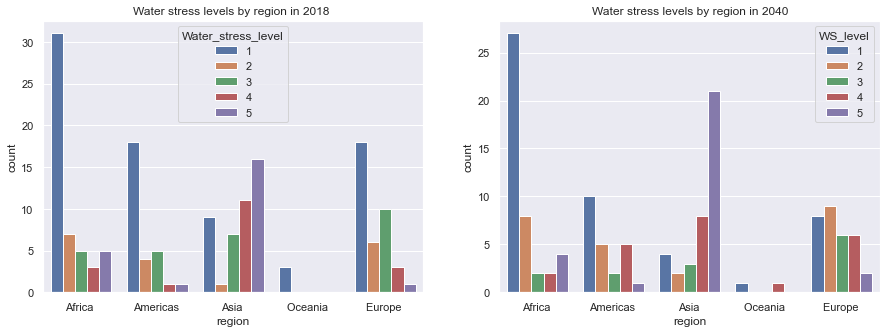

In [221]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Water stress by region in 2018
sns.countplot(ax=axes[0], x="region",hue = "Water_stress_level", data=df).set(title = "Water stress levels by region in 2018 ")

# Water stress by region in 2040
sns.countplot(ax=axes[1], x='region',hue = "WS_level", data=data).set(title="Water stress levels by region in 2040")

plt.savefig('water stress levels by region.png')